<a href="https://colab.research.google.com/github/AutumnDilks/CS4410/blob/main/CS4410Hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
# imports 

from sklearn.datasets import load_breast_cancer #loading data set 
breastCancer= load_breast_cancer() 
print(breastCancer.DESCR) 

from sklearn.model_selection import train_test_split  

import pandas as pd 

import seaborn as sns  

import numpy as np


#import matplotlib.pyplot as plt



.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [137]:
# checking sample and target sizes 

breastCancer.target[::100] 





array([0, 0, 1, 0, 0, 1])

In [138]:
breastCancer.data.shape 

(569, 30)

In [139]:
breastCancer.target.shape

(569,)

In [140]:
#splitting the data for training and testing  

X_train, X_test, y_train, y_test = train_test_split(breastCancer.data, breastCancer.target, random_state=11)# random state? 

In [141]:
#training and testing set sizes 

X_train.shape

(426, 30)

In [142]:
X_test.shape

(143, 30)

In [143]:
#creating the model

from sklearn.neighbors import KNeighborsClassifier 
knn= KNeighborsClassifier()


In [144]:
#training the model 

knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [145]:
#predicting 

predicted = knn.predict(X=X_test) 


In [146]:
expected = y_test  


In [147]:
predicted[:20]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [148]:
expected[:20]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [149]:
wrong = [(p,e) for (p,e) in zip(predicted,expected) if p!=e]
         

In [150]:
wrong

[(1, 0), (0, 1), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0)]

In [151]:
#Estimator Method score 

print(f'{knn.score(X_test,y_test):.2%}')

94.41%


In [152]:
#Confusion Matrix 

from sklearn.metrics import confusion_matrix 

confusion= confusion_matrix(y_true=expected, y_pred=predicted)

In [153]:
confusion

array([[43,  7],
       [ 1, 92]])

In [154]:
#Classification Report 

from sklearn.metrics import classification_report 

names = [str(breastCancer) for breastCancer in breastCancer.target_names]

In [155]:
print(classification_report(expected,predicted,target_names=names))

              precision    recall  f1-score   support

   malignant       0.98      0.86      0.91        50
      benign       0.93      0.99      0.96        93

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.94       143
weighted avg       0.95      0.94      0.94       143



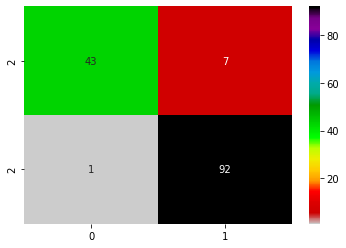

In [156]:
#Visualizing the Confusion Matrix 

import pandas as pd 

confusion_df = pd.DataFrame(confusion,  index=(2,2)) 
                           
 
import seaborn as sns 

axes=sns.heatmap(confusion_df,annot=True,
                  cmap='nipy_spectral_r')

In [157]:
from sklearn.svm import SVC 

from sklearn.naive_bayes import GaussianNB 
nb = GaussianNB()

from sklearn.linear_model import LogisticRegression

In [158]:
# K-Fold Cross-Validation Using the KFold Object with Function cross_val_score: 

from sklearn.model_selection import KFold 

kfold = KFold(n_splits=10, random_state=11, shuffle=True) 


In [159]:
from sklearn.model_selection import cross_val_score 

scores = cross_val_score(estimator=nb,X=breastCancer.data, y= breastCancer.target, cv=kfold) 

In [160]:
scores

array([0.96491228, 0.9122807 , 0.94736842, 0.89473684, 0.96491228,
       0.94736842, 0.96491228, 0.89473684, 0.96491228, 0.92857143])

In [161]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 93.85%


In [162]:
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 2.75%


In [163]:
estimators = {'GaussianNB': nb,'KNeighborsClassifer': KNeighborsClassifier(),'LogisticRegression': LogisticRegression(solver='lbfgs',multi_class='ovr',max_iter=10000),'SVC':SVC(gamma='scale')} 


In [164]:
for estimators_name,estimators_object in estimators.items(): 
  kfold= KFold(n_splits=10,random_state=11, shuffle=True)
  scores=cross_val_score(estimator= estimators_object ,X=breastCancer.data,y=breastCancer.target,cv=kfold) 
  print(f'{estimators_name:>20}:'+f'mean accuracy={scores.mean():.2%};'+f'standard deviation={scores.std():.2%}')



          GaussianNB:mean accuracy=93.85%;standard deviation=2.75%
 KNeighborsClassifer:mean accuracy=92.79%;standard deviation=2.01%
  LogisticRegression:mean accuracy=95.08%;standard deviation=3.02%
                 SVC:mean accuracy=91.92%;standard deviation=3.52%
